## IOT Data Cleaning and Visualisation 

### Import required packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.dates as mdates
import re
import os
import datetime
import seaborn as sn

### Reading in data obtained from IOT Platform
  - Download data as csv files and use load it using pandas
  - Download json data through the API
  - download the sample air quality data csv file from the session website (session 4). (https://airqo.net/dsa/)


In [35]:
base_dir ='data'
airquality_data = pd.read_csv(os.path.join(base_dir,'AQ_15_DSA.csv'), parse_dates = ['created_at'])

### Data Inspection

In [36]:
airquality_data.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
0,2019-01-29 12:40:18,1,25.48,27.33,28.52,30.42,0.000000,0.000000,4.02,NaN,NaN,NaN,NaN,NaN
1,2019-01-29 12:41:34,2,24.87,25.83,31.00,32.65,1000.000000,1000.000000,3.79,NaN,NaN,NaN,NaN,NaN
2,2019-01-29 12:47:33,3,28.52,31.03,29.80,31.35,0.000000,0.000000,4.02,NaN,NaN,NaN,NaN,NaN
3,2019-01-29 12:49:56,4,27.15,28.35,30.80,32.10,1000.000000,1000.000000,3.77,NaN,NaN,NaN,NaN,NaN
4,2019-01-31 10:40:45,5,17.68,19.68,17.47,19.07,1.333921,34.372246,3.88,NaN,NaN,NaN,NaN,NaN


In [37]:
airquality_data.tail()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8,latitude,longitude,elevation,status
93829,2019-10-02 14:40:36,93830,29.60,40.52,31.43,36.25,1.333871,34.372238,3.71,"1.333871,34.372238,1772.30,0.15,10.00,88.00,0....",NaN,NaN,NaN,NaN
93830,2019-10-02 14:41:59,93831,101.13,116.60,105.43,112.90,1.333883,34.372231,3.71,"1.333883,34.372231,1774.10,0.05,10.00,84.00,0....",NaN,NaN,NaN,NaN
93831,2019-10-02 14:43:29,93832,142.78,156.87,155.25,165.80,1.333903,34.372280,3.70,"1.333903,34.372280,1774.90,0.07,10.00,100.00,0...",NaN,NaN,NaN,NaN
93832,2019-10-02 14:44:49,93833,35.65,42.58,34.17,39.97,1.333855,34.372295,3.70,"1.333855,34.372295,1764.10,0.08,11.00,83.00,0....",NaN,NaN,NaN,NaN
93833,2019-10-02 14:46:11,93834,40.25,52.53,41.60,50.95,1.333859,34.372288,3.70,"1.333859,34.372288,1760.50,0.03,11.00,83.00,0....",NaN,NaN,NaN,NaN


In [38]:
print('shape of the data')
print(airquality_data.shape)

print('number of rows in the dataset') 
print(airquality_data.shape[0])

shape of the data
(93834, 14)
number of rows in the dataset
93834


In [39]:
print(list(airquality_data.columns.values))

['created_at', 'entry_id', 'field1', 'field2', 'field3', 'field4', 'field5', 'field6', 'field7', 'field8', 'latitude', 'longitude', 'elevation', 'status']


In [40]:
airquality_data.dtypes

created_at    datetime64[ns]
entry_id               int64
field1               float64
field2               float64
field3               float64
field4               float64
field5               float64
field6               float64
field7               float64
field8                object
latitude             float64
longitude            float64
elevation            float64
status               float64
dtype: object

In [41]:
airquality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93834 entries, 0 to 93833
Data columns (total 14 columns):
created_at    93834 non-null datetime64[ns]
entry_id      93834 non-null int64
field1        93834 non-null float64
field2        93834 non-null float64
field3        93834 non-null float64
field4        93834 non-null float64
field5        93834 non-null float64
field6        93834 non-null float64
field7        93834 non-null float64
field8        82085 non-null object
latitude      0 non-null float64
longitude     0 non-null float64
elevation     0 non-null float64
status        0 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1), object(1)
memory usage: 10.0+ MB


### Rename column names 

In [42]:
airquality_data.rename(columns={'created_at':'TimeStamp','field1':'s1_pm2_5','field2':'s1_pm10',
                                     'field3':'s2_pm2_5', 'field4':'s2_pm10',
                                     'field5': 'Latitude', 'field6':'Longitude', 'field7':'Battery Voltage', 'field8':'GpsData'},inplace=True)

### Drop the columns that we won't be using

In [43]:
airquality_data_of_interest = airquality_data.drop(['entry_id','Battery Voltage','latitude','longitude','elevation',
                                                    'status','GpsData',], axis=1)

### Show the summaries i.e mean, median, quaurtiles, count

In [44]:
airquality_data_of_interest.describe()

,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude
count,93834.000000,93834.000000,93834.000000,93834.00000,93834.000000,93834.000000
mean,21.664234,27.359923,23.249641,26.12310,597.178577,610.290555
std,15.953107,20.357442,16.550017,19.46318,489.928987,473.989563
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,12.220000,14.930000,13.170000,14.28000,1.333874,34.372250
50%,18.280000,22.830000,19.950000,21.53000,1000.000000,1000.000000
75%,27.400000,34.580000,29.570000,32.50000,1000.000000,1000.000000
max,891.520000,1490.320000,725.800000,1082.08000,1000.000000,1000.000000


In [45]:
airquality_data_of_interest.head()

,TimeStamp,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude
0,2019-01-29 12:40:18,25.48,27.33,28.52,30.42,0.000000,0.000000
1,2019-01-29 12:41:34,24.87,25.83,31.00,32.65,1000.000000,1000.000000
2,2019-01-29 12:47:33,28.52,31.03,29.80,31.35,0.000000,0.000000
3,2019-01-29 12:49:56,27.15,28.35,30.80,32.10,1000.000000,1000.000000
4,2019-01-31 10:40:45,17.68,19.68,17.47,19.07,1.333921,34.372246


### Parsing the created_at field into a datetime object
    This is important for indexing using datetime
    localise timezone
    In case of any duplicate timestamp, keep one of the duplicated records
    

In [46]:
airquality_data_of_interest['TimeStamp'].dt.tz_localize('Africa/Kampala')
airquality_data_of_interest = airquality_data_of_interest.drop_duplicates(subset='TimeStamp', keep='first')
time_indexed_data = airquality_data_of_interest.set_index('TimeStamp')
time_indexed_data.head()

,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude
TimeStamp,,,,,,
2019-01-29 12:40:18,25.48,27.33,28.52,30.42,0.000000,0.000000
2019-01-29 12:41:34,24.87,25.83,31.00,32.65,1000.000000,1000.000000
2019-01-29 12:47:33,28.52,31.03,29.80,31.35,0.000000,0.000000
2019-01-29 12:49:56,27.15,28.35,30.80,32.10,1000.000000,1000.000000
2019-01-31 10:40:45,17.68,19.68,17.47,19.07,1.333921,34.372246


### Get average values for both sensors

### Deal with outliers

In [47]:
# Finding out how many latitude or longitude entries have 0 or 1000
bad_lat = []
bad_long = []

for lat in time_indexed_data['Latitude']:
    if ((lat==0) or (lat==1000)):
        bad_lat.append(lat)
print ('Bad latitudes are ', len(bad_lat))
for long in time_indexed_data['Longitude']:
    if ((long==0) or (long==1000)):
        bad_long.append(long)
print ('Bad longitudes are ', len(bad_long))

Bad latitudes are  56594
Bad longitudes are  56594


In [48]:
#Replacing latitude and longitude values of 0 and 1000 with Null
time_indexed_data['Latitude'] = time_indexed_data['Latitude'].replace([0,1000], np.nan)
time_indexed_data['Longitude'] =time_indexed_data['Longitude'].replace([0,1000], np.nan)
time_indexed_data.head(5)

,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude
TimeStamp,,,,,,
2019-01-29 12:40:18,25.48,27.33,28.52,30.42,NaN,NaN
2019-01-29 12:41:34,24.87,25.83,31.00,32.65,NaN,NaN
2019-01-29 12:47:33,28.52,31.03,29.80,31.35,NaN,NaN
2019-01-29 12:49:56,27.15,28.35,30.80,32.10,NaN,NaN
2019-01-31 10:40:45,17.68,19.68,17.47,19.07,1.333921,34.372246


### Show null values in each column

In [49]:
time_indexed_data.isnull().sum()

s1_pm2_5         0
s1_pm10          0
s2_pm2_5         0
s2_pm10          0
Latitude     56594
Longitude    56594
dtype: int64

In [50]:
time_indexed_data['Latitude'] = time_indexed_data['Latitude'].fillna(method = 'bfill')
time_indexed_data['Longitude'] = time_indexed_data['Longitude'].fillna(method = 'bfill')
time_indexed_data.isnull().sum()

s1_pm2_5     0
s1_pm10      0
s2_pm2_5     0
s2_pm10      0
Latitude     0
Longitude    0
dtype: int64

In [51]:
#Replacing values outside acceptable range with the other sensor's data

time_indexed_data['s1_pm2_5'] = np.where(((time_indexed_data['s1_pm2_5']<=0) | (time_indexed_data['s1_pm2_5'] >500.4)),
                                       time_indexed_data['s2_pm2_5'], time_indexed_data['s1_pm2_5'])

time_indexed_data['s2_pm2_5'] = np.where(((time_indexed_data['s2_pm2_5']<=0) | (time_indexed_data['s2_pm2_5'] >500.4)),
                                       time_indexed_data['s1_pm2_5'], time_indexed_data['s2_pm2_5'])
        

In [52]:
#Dropping pm2.5 greater than 500.4 or less than or equal to 0 for both sensors
outlier_indices = time_indexed_data[((time_indexed_data['s1_pm2_5'] > 500.4) & (time_indexed_data['s2_pm2_5'] > 500.4)) |
                                    ((time_indexed_data['s1_pm2_5'] <= 0) & (time_indexed_data['s2_pm2_5'] <=0))].index
print(len(outlier_indices))
time_indexed_data.drop(outlier_indices, inplace = True)
time_indexed_data.info()

4
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93830 entries, 2019-01-29 12:40:18 to 2019-10-02 14:46:11
Data columns (total 6 columns):
s1_pm2_5     93830 non-null float64
s1_pm10      93830 non-null float64
s2_pm2_5     93830 non-null float64
s2_pm10      93830 non-null float64
Latitude     93830 non-null float64
Longitude    93830 non-null float64
dtypes: float64(6)
memory usage: 5.0 MB


In [53]:
time_indexed_data.head()

,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude
TimeStamp,,,,,,
2019-01-29 12:40:18,25.48,27.33,28.52,30.42,1.333921,34.372246
2019-01-29 12:41:34,24.87,25.83,31.00,32.65,1.333921,34.372246
2019-01-29 12:47:33,28.52,31.03,29.80,31.35,1.333921,34.372246
2019-01-29 12:49:56,27.15,28.35,30.80,32.10,1.333921,34.372246
2019-01-31 10:40:45,17.68,19.68,17.47,19.07,1.333921,34.372246


In [54]:
## obtaining the averages of sensor one and sensor two readings
time_indexed_data['pm2_5'] =time_indexed_data[['s1_pm2_5', 's2_pm2_5']].mean(axis=1)
time_indexed_data['pm10'] =time_indexed_data[['s1_pm10', 's2_pm10']].mean(axis=1)

### Data Visualisation

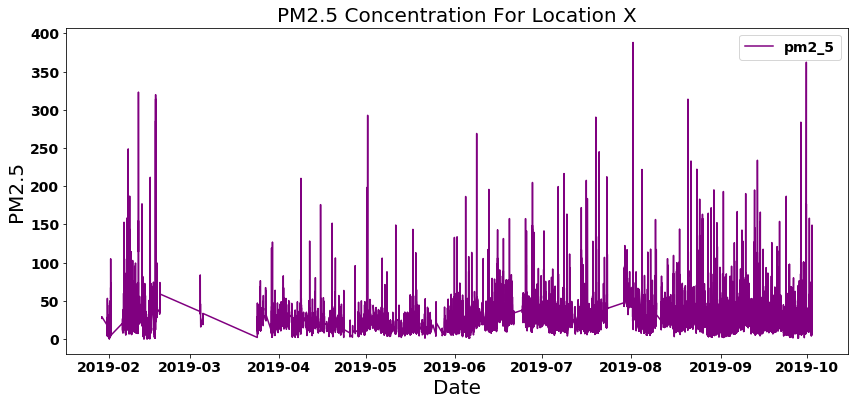

<Figure size 432x288 with 0 Axes>

In [55]:
    fig = plt.figure(figsize=(14,6))
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    plt.plot(time_indexed_data.index, 
             time_indexed_data['pm2_5'], color='purple', linestyle='solid') 
    
    chart_title =  'PM2.5 Concentration For Location X'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    plt.tight_layout()
    fig.savefig(os.path.join(base_dir,'pm25_concentration_for_location_x.png'))

### Compute average, minimum and maximum hourly, daily, monthly concentration values
    - calculate the corresponding averages for hourly, daily and monthly observations

In [56]:
hourly_average_airquality_data_concentrations = time_indexed_data.resample('H').mean().round(2).dropna(axis=0) 
hourly_maximum_airquality_data_concentrations  = time_indexed_data.resample('H').max().round(2).dropna(axis=0)
hourly_minimum_airquality_data_concentrations  = time_indexed_data.resample('H').min().round(2).dropna(axis=0)

daily_average_airquality_data_concentrations  = time_indexed_data.resample('D').mean().round(2).dropna(axis=0)
daily_maximum_airquality_data_concentrations  = time_indexed_data.resample('D').max().round(2).dropna(axis=0)
daily_minimum_airquality_data_concentrations  = time_indexed_data.resample('D').min().round(2).dropna(axis=0)

monthly_average_airquality_data_concentrations  = time_indexed_data.resample('M').mean().round(2).dropna(axis=0)
monthly_maximum_airquality_data_concentrations  = time_indexed_data.resample('M').max().round(2).dropna(axis=0)
monthly_minimum_airquality_data_concentrations  = time_indexed_data.resample('M').min().round(2).dropna(axis=0)

hourly_average_airquality_data_concentrations.head()

,s1_pm2_5,s1_pm10,s2_pm2_5,s2_pm10,Latitude,Longitude,pm2_5,pm10
TimeStamp,,,,,,,,
2019-01-29 12:00:00,26.51,28.14,30.03,31.63,1.33,34.37,28.27,29.88
2019-01-31 10:00:00,18.47,21.23,18.91,21.35,1.33,34.37,18.69,21.29
2019-01-31 11:00:00,7.02,7.95,8.14,8.74,1.33,34.37,7.58,8.34
2019-01-31 12:00:00,9.70,10.25,11.01,11.47,1.33,34.37,10.35,10.86
2019-01-31 13:00:00,7.81,8.56,8.65,9.14,1.33,34.37,8.23,8.85


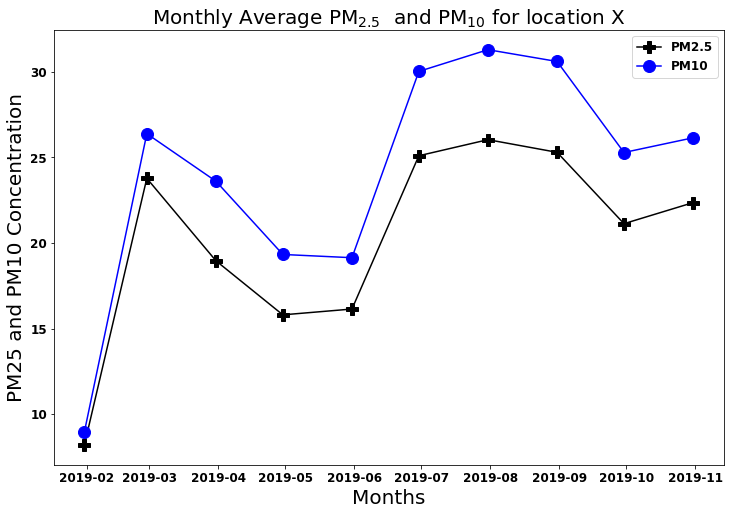

In [57]:
    plt.rcParams.update({'font.size':14, 'font.weight':'bold','mathtext.default':  'regular'})
    x_axis_label = 'Months'
    y_axis_label =  'PM25 and PM10 Concentration'
    chart_title  =  'Monthly Average $PM_{2.5}$  and $PM_{10}$ for location X'
    file_path_no_aqi_color   =   os.path.join(base_dir , 'average_pm25_foreach_month_for_locations_x.png')
    
    
    fig = plt.figure(figsize=(12,8))
    plt.rcParams.update({'font.size':12, 'font.weight':'bold', 'mathtext.default':  'regular'})
    ax = fig.add_subplot(111)
  
    plt.plot(monthly_average_airquality_data_concentrations.index, 
             monthly_average_airquality_data_concentrations['pm2_5'].values, 
             color='black', marker='P', linestyle='solid',  label='PM2.5', linewidth=1.5,markersize=12)
    
    plt.plot(monthly_average_airquality_data_concentrations.index, 
             monthly_average_airquality_data_concentrations['pm10'].values, 
             color='blue', marker='o', linestyle='solid',  label='PM10', linewidth=1.5,markersize=12)
    
    
    plt.title(chart_title, fontsize=20)
    plt.ylabel(y_axis_label, fontsize=20)
    plt.xlabel(x_axis_label,fontsize=20)
    
    plt.legend(loc='upper right')
    plt.show()
    fig.savefig(file_path_no_aqi_color)

### Daily Summaries

In [58]:
print(daily_average_airquality_data_concentrations.shape) #shape of dataframe
print(daily_average_airquality_data_concentrations.max()) #max values in dataframe

(201, 8)
s1_pm2_5     55.21
s1_pm10      69.79
s2_pm2_5     57.14
s2_pm10      67.31
Latitude      1.33
Longitude    34.37
pm2_5        56.18
pm10         68.55
dtype: float64


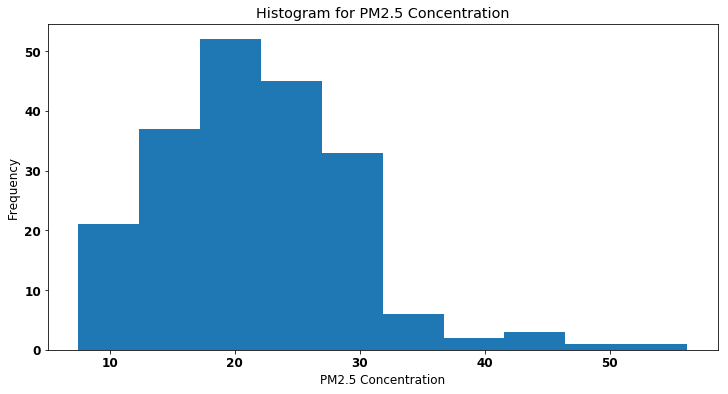

In [59]:
plt.rc('figure', figsize=(12,6))
plt.hist(daily_average_airquality_data_concentrations['pm2_5'], 10)
plt.ylabel('Frequency')
plt.xlabel('PM2.5 Concentration')
plt.title('Histogram for PM2.5 Concentration')
plt.show()

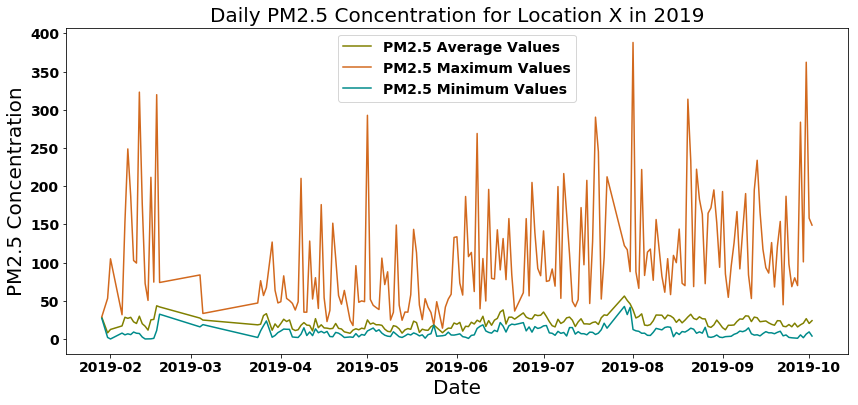

In [60]:
    fig = plt.figure(figsize=(14,6))
    
    plt.rcParams.update({'font.size':14, 'font.weight':'bold'})
    
    plt.plot(daily_average_airquality_data_concentrations.index, 
             daily_average_airquality_data_concentrations['pm2_5'], 
             color='olive',  linestyle='solid', label='PM2.5 Average Values')
    
    plt.plot(daily_maximum_airquality_data_concentrations.index, 
             daily_maximum_airquality_data_concentrations['pm2_5'], 
             color='chocolate',  linestyle='solid', label='PM2.5 Maximum Values')
    
    plt.plot(daily_minimum_airquality_data_concentrations.index, 
             daily_minimum_airquality_data_concentrations['pm2_5'], 
             color='darkcyan', linestyle='solid', label='PM2.5 Minimum Values')
    
    chart_title =  'Daily PM2.5 Concentration for Location X in 2019'
    plt.title(chart_title,fontsize=20)
    plt.ylabel('PM2.5 Concentration', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    fig.savefig(os.path.join(base_dir,'daily_pm25_concentration_location_x_2019.png'))

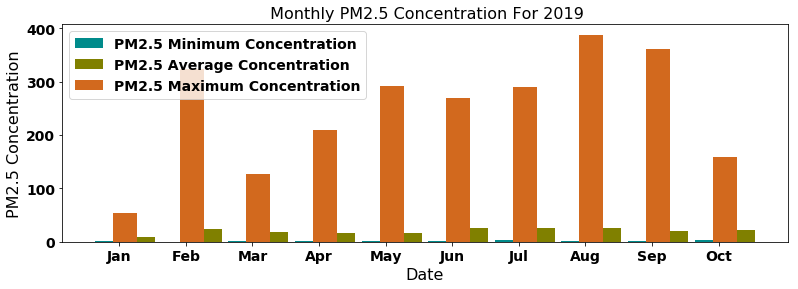

In [61]:
ind = np.arange(len(monthly_average_airquality_data_concentrations))
width = 0.36
#0.525
fig = plt.figure(figsize=(13,4))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind- width/2, monthly_minimum_airquality_data_concentrations['pm2_5'], width, color='darkcyan', label='PM2.5 Minimum Concentration')
rects3 = ax.bar(ind + width, monthly_average_airquality_data_concentrations['pm2_5'], width, color='olive', label='PM2.5 Average Concentration')
rects2 = ax.bar(ind+ width/4,  monthly_maximum_airquality_data_concentrations['pm2_5'], width, color='chocolate',label='PM2.5 Maximum Concentration')
 
ax.set_ylabel('PM2.5 Concentration',fontsize=16)
ax.set_title(' Monthly PM2.5 Concentration For 2019', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
ax.set_xticks(ind)
x_tick_labels = pd.to_datetime(monthly_average_airquality_data_concentrations.index)
final_labels= []
for x in x_tick_labels:
    final_labels.append(x.strftime('%b'))
ax.set_xticklabels(final_labels, fontsize=14)
ax.legend()


plt.show()
fig.savefig( 'monthly_pm25_concentration_bargraph.png')


In [62]:
time_indexed_data_september= time_indexed_data['2019-09-01 00:00:00': '2019-09-30 23:59:59']

Things that can be done as take away from this section
- At what time of the day did the device record the maximum and minimum observations